In [0]:
import keras
import pandas as pd
import numpy as np

Using TensorFlow backend.


# 1. Data Preparation

In [0]:
max_item_id = 10000		# use as a way to constrict memory errors, increase as needed

## 1.1 Playtime Matrix

Source file: User_items.json 

{'user_id': '76561197970982479',
 'items_count': 277,
 'steam_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'items': [{'item_id': '10',
 'item_name': 'Counter-Strike',
 'playtime_forever': 6,
 'playtime_2weeks': 0},
 {'item_id': '20',
 'item_name': 'Team Fortress Classic',
 'playtime_forever': 0,
 'playtime_2weeks': 0},}
 
 
 We reorganize it as a user_item matrix. This is the main input layer.

In [0]:
# import json
# import pandas as pd
# import ast
# import numpy as np
# from collections import OrderedDict
# from sklearn.preprocessing import MinMaxScaler

# filepath = './user_items.json'
# writefilepath = './user_items_playtime_' + str(max_item_id) + '.csv'

# data = []
# game_ids_valid = set()	# We only want to have game ids that appear in any user's game list

# num_games_considered = 0 # Just for profiling
# num_valid_users = 0		# Also profiling

# count = 0
# with open(filepath,encoding='gb18030',errors='ignore') as f:
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes

# 		# Don't consider a user that doesn't own any games
# 		if int(l["items_count"]) > 0:		
# 			games = l["items"]
# 			games_filter = []
# 			for g in games:
# 				playtime = g["playtime_forever"]
# 				if playtime > 0:	# Also don't consider games not played
# 					game_id = int(g["item_id"])
# 					if game_id <=  max_item_id: 		# Set limit on games due to space
# 						games_filter.append({game_id: playtime})
# 						game_ids_valid.add(game_id)
# 						num_games_considered += 1

# 			if len(games_filter) >= 1:		
# 				num_valid_users += 1	
# 				data.append({l["user_id"]: games_filter})
        
# 		#count = count+1
# 		#print(count)

        

# print(max_item_id)
# print(num_games_considered)
# print(len(game_ids_valid))
# print(num_valid_users)

In [0]:
# # Now with format as data (list of nested JSON objects) = 	[	{user_id: [	{item_id: playtime_forever}		]	}	]
# # Convert to dataframe where
# #		item_id		0		..		max_item_id		
# #  user_id 			
# #	x1				playtime_forever
# #	...
# #	xn
# #
# # 
# # Create list of game_id's only based on the valid game ids
# game_list = list(game_ids_valid)
# game_list = sorted(game_list)
# print(*game_list)
# games_dict = OrderedDict()

# df = pd.DataFrame(columns = list(game_list))
# items_list = np.zeros(len(game_list))


# for user in data:
	
# 	# Clear entries of sorted Dictionary (and creates the first set of key-value pairs)
# 	for k in game_list:	
# 		games_dict[k] = 0

# 	key = next(iter(user))	# Note there's only one key. User is {user_id: [...]}
# 	df.loc[key] = 0
# 	items = user[key]
# 	for i in items:
# 		[(k, v)] = i.items()
# 		games_dict[k] = v

# 	# Make the list based on the sorted values in dict
# 	val = list(games_dict.values())
# 	for i in range(len(game_list)):
# 		df.loc[key][game_list[i]] = val[i]

# df.to_csv(writefilepath, index=False)

In [0]:
writefilepath = './user_items_playtime_' + str(max_item_id) + '.csv'
df_matrix = pd.read_csv(writefilepath,engine='python')
print(df_matrix.shape)
df_matrix.head()

(61244, 354)


,10,20,30,40,50,60,70,80,100,130,220,240,280,300,320,340,360,380,400,420,500,550,620,730,1002,1200,1230,1250,1280,1300,1309,1313,1500,1510,1520,1530,1600,1610,1630,1640,...,8890,8930,8970,8980,9000,9010,9030,9040,9050,9060,9070,9160,9180,9200,9310,9340,9350,9400,9420,9450,9460,9480,9500,9710,9730,9740,9760,9800,9850,9860,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,6,0,7,0,0,0,0,0,0,0,696,1853,0,4733,0,37,0,168,173,323,513,1474,887,23532,0,0,0,10006,0,0,0,0,0,0,0,0,0,0,0,0,...,0,10345,0,3061,0,0,0,0,0,0,0,0,0,653,0,692,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,750,62,0,220,0,21,0,181,169,295,0,83,3464,265,0,0,0,428,0,0,0,0,0,0,0,0,0,0,0,0,...,0,748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,224,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1323,0,0,0,0,90,0,234,113,507,0,82,1485,1569,0,923,0,1646,0,0,0,0,0,0,158,0,0,0,0,0,...,0,0,0,9202,0,616,0,0,32,0,0,0,218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,92,2304,0,67,0,0,0,0,1234,119,103,330,5138,4167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,19,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,93,89,16,4,178,0,108,13,47,313,89,164,0,1131,187,19,0,491,167,233,0,9216,802,19800,0,0,0,3546,0,18,0,4,1,0,19,0,0,0,0,0,...,0,2699,0,4076,0,25,0,0,9,0,0,0,0,970,0,1211,0,0,0,0,0,320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# ##scale matrix
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,10))
# scaled_values = scaler.fit_transform(df_matrix)
# df_scaled_matrix = pd.DataFrame(scaled_values)
# #df.loc[:,:] = scaled_values

tmax = 50 * 60 # 50 hrs
df_scaled_matrix = np.tanh(df_matrix * 2 / tmax)

In [0]:
df_scaled_matrix.head()

,10,20,30,40,50,60,70,80,100,130,220,240,280,300,320,340,360,380,400,420,500,550,620,730,1002,1200,1230,1250,1280,1300,1309,1313,1500,1510,1520,1530,1600,1610,1630,1640,...,8890,8930,8970,8980,9000,9010,9030,9040,9050,9060,9070,9160,9180,9200,9310,9340,9350,9400,9420,9450,9460,9480,9500,9710,9730,9740,9760,9800,9850,9860,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,0.004000,0.000000,0.004667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.433339,0.844119,0.0,0.996373,0.000000,0.024662,0.0,0.111534,0.114825,0.212066,0.329262,0.754218,0.530854,1.000000,0.0,0.00000,0.0,0.999997,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.999998,0.0,0.966791,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.409769,0.0,0.431170,0.0,0.0,0.0,0.0,0.0,0.000000,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.462117,0.041310,0.0,0.145624,0.000000,0.013999,0.0,0.120084,0.112192,0.194170,0.000000,0.055277,0.980461,0.174851,0.0,0.00000,0.0,0.277834,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.461068,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.019997,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148233,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.707420,0.000000,0.0,0.000000,0.000000,0.059928,0.0,0.154747,0.075191,0.325691,0.000000,0.054612,0.757362,0.780246,0.0,0.54787,0.0,0.799539,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.104945,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.999991,0.0,0.389039,0.0,0.0,0.02133,0.0,0.0,0.0,0.144319,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.061257,0.911446,0.0,0.044637,0.000000,0.000000,0.0,0.000000,0.676519,0.079167,0.068559,0.216518,0.997885,0.992301,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.012666,0.0,0.021996,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.025994,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.061921,0.059264,0.010666,0.002667,0.118113,0.0,0.071876,0.008666,0.031323,0.20569,0.059264,0.108900,0.0,0.637529,0.124025,0.012666,0.0,0.316123,0.110876,0.154096,0.000000,0.999991,0.488940,1.000000,0.0,0.00000,0.0,0.982467,0.0,0.011999,0.0,0.002667,0.000667,0.0,0.012666,0.0,0.0,0.0,0.0,0.0,...,0.0,0.946737,0.0,0.991313,0.0,0.016665,0.0,0.0,0.00600,0.0,0.0,0.0,0.000000,0.569422,0.0,0.668117,0.0,0.0,0.0,0.0,0.0,0.210155,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 1.2 Game info for each user

In [0]:
# import ast
# import json
# import pandas as pd


# filepath = './user_items.json'
# df1 = pd.DataFrame(columns = ['userid', 'game_names'])

# max_game_id = max_item_id

# with open(filepath,encoding='gb18030',errors='ignore') as f:
# 	game_id_list = []
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes
	
# 		# Don't consider a user that doesn't own any games
# 		if int(l["items_count"]) > 0:
# 			games = l["items"]
# 			games_filter = []
# 			for g in games:
# 				playtime = g["playtime_forever"]
# 				if playtime > 0:	# Also don't consider games not played
# 					game_id = int(g["item_id"])
# 					if game_id <= max_game_id: 		# Set limit on games due to space
# 						games_filter.append(g["item_name"])
			
# 			if len(games_filter) >= 1:
# 				df1.loc[l["user_id"]] = pd.Series({'userid': l["user_id"], 'game_names': games_filter})

# filepath = './steam_games.json'

In [0]:
# #### NEED TO GET USER_ID WITH GAME_GENRE ###################
# df2 = pd.DataFrame(columns = ['userid', 'game_genres'])
# df21 = pd.DataFrame(columns = ['game_name', 'genres'])
# i = 0

# with open(filepath) as f:
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes

# 		if "title" in l:
# 			game = l["title"]
# 		elif "app_name" in l:
# 			game = l["app_name"]
# 		else:
# 			game = 0

# 		if "genres" in l:
# 			genres = l["genres"]
# 		elif "tags" in l:
# 			genres = l["tags"]
# 		else:
# 			genres = 0

# 		if game != 0:
# 			df21.loc[i] = pd.Series({'game_name': game, 'genres': genres})
# 			i += 1

# # Match game_names from df1 with game_name from df21, create set of genres from it (then convert to list) for df2
# for row in df1.itertuples():
#     genre_list = set()
#     for name in row.game_names:
#         g = df21[df21.game_name == name]
#         for k in g.genres:
#             # Should only have one value for k (the list itself)
#             # Iterate through the list for its values now
#             for l in k:
#                 genre_list.add(l)
#     df2.loc[row.Index] = pd.Series({'userid': row.userid, 'game_genres': list(genre_list)})

In [0]:
# filepath = './user_reviews.json'

# df3 = pd.DataFrame(columns = ["userid","reviews"])
# i = 0

# with open(filepath) as f:
# 	for line in f:
# 		l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes

# 		reviews = l["reviews"]
# 		review_list = []

# 		for r in reviews:
# 			review_list.append(r["review"])

# 		if len(review_list) == 0:
# 			df3.loc[i] = pd.Series({"userid": l["user_id"], "reviews": 0})
# 		else:
# 			df3.loc[i] = pd.Series({"userid": l["user_id"], "reviews": review_list})
# 		i += 1
# df = df1.merge(df2, how='left', on='userid').merge(df3.drop_duplicates(subset=['userid']), how='left', on='userid')
# df = df.fillna(0)

# writefilepath = './user_game_info_' + str(max_item_id) + '.csv'
# df.to_csv(writefilepath, index=False)

In [0]:
writefilepath = './user_game_info_' + str(max_item_id) + '.csv'
df_user_gameinfo = pd.read_csv(writefilepath)
print(df_user_gameinfo.shape)
df_user_gameinfo.head()

(61244, 4)


,userid,game_names,game_genres,reviews
0,76561197970982479,"['Counter-Strike', 'Day of Defeat', 'Day of De...","['Adventure', 'RPG', 'Indie', 'Action', 'Strat...",['Simple yet with great replayability. In my o...
1,js41637,"['Day of Defeat: Source', 'Counter-Strike: Sou...","['Adventure', 'Indie', 'Action', 'Simulation',...",['I know what you think when you see this titl...
2,evcentric,"['Red Orchestra: Ostfront 41-45', 'DEFCON', 'H...","['Adventure', 'RPG', 'Casual', 'Indie', 'Actio...","[""A suitably punishing roguelike platformer. ..."
3,Riot-Punch,"['Day of Defeat: Source', 'Counter-Strike: Sou...","['Adventure', 'RPG', 'Indie', 'Action', 'Simul...",0
4,doctr,"['Day of Defeat: Source', 'Team Fortress Class...","['Adventure', 'RPG', 'Casual', 'Indie', 'Actio...",['This game... is so fun. The fight sequences ...


In [0]:
#transform games names from word to int, using one_hot
from keras.preprocessing.text import one_hot

vocab_size1   = 100
encoded_gamenames = [one_hot(d, vocab_size1) for d in df_user_gameinfo.game_names]
df_user_gamenames_encoded = pd.DataFrame(data=encoded_gamenames).fillna(0.0)    # values
df_user_gamenames_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477
0,27,11.0,52.0,12.0,23.0,52.0,12.0,41.0,58.0,27.0,19.0,58.0,35.0,64.0,12.0,60.0,76.0,71.0,34.0,18.0,38.0,71.0,34.0,26.0,69.0,60.0,77.0,16.0,37.0,91.0,12.0,97.0,14.0,35.0,52.0,3.0,39.0,76.0,3.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,52,12.0,41.0,58.0,27.0,19.0,58.0,71.0,34.0,18.0,78.0,24.0,20.0,11.0,77.0,78.0,61.0,29.0,20.0,89.0,34.0,3.0,39.0,76.0,3.0,39.0,86.0,2.0,10.0,3.0,39.0,86.0,40.0,2.0,45.0,3.0,39.0,86.0,40.0,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,34.0,60.0,67.0,86.0,31.0,3.0,39.0,76.0,3.0,39.0,86.0,2.0,10.0,3.0,39.0,86.0,40.0,2.0,45.0,3.0,39.0,86.0,40.0,93.0,72.0,62.0,31.0,36.0,1.0,40.0,91.0,11.0,76.0,41.0,76.0,77.0,86.0,98.0,88.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52,12.0,41.0,58.0,27.0,19.0,58.0,20.0,11.0,52.0,3.0,39.0,76.0,45.0,3.0,39.0,86.0,40.0,93.0,1.0,89.0,47.0,14.0,86.0,40.0,91.0,60.0,81.0,20.0,76.0,40.0,91.0,11.0,76.0,56.0,15.0,76.0,71.0,34.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52,12.0,41.0,58.0,54.0,65.0,34.0,3.0,39.0,84.0,77.0,3.0,31.0,3.0,39.0,72.0,49.0,27.0,11.0,52.0,12.0,23.0,18.0,34.0,27.0,19.0,41.0,13.0,27.0,19.0,41.0,48.0,28.0,31.0,43.0,62.0,23.0,17.0,98.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#repeat the same for genres and reviews
vocab_size2   = 10
encoded_gamegenres = [one_hot(d, vocab_size2) for d in df_user_gameinfo.game_genres]
df_user_gamegenres_encoded = pd.DataFrame(data=encoded_gamegenres).fillna(0.0)    # values
df_user_gamegenres_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,9.0,7.0,6.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,6.0,7.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,7.0,2.0,6.0,7.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,7.0,6.0,7.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,7.0,2.0,6.0,7.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
vocab_size3   = 500
encoded_reviews = [one_hot(d, vocab_size3) for d in df_user_gameinfo.reviews]
df_user_reviews_encoded = pd.DataFrame(data=encoded_reviews).fillna(0.0)    # values
df_user_reviews_encoded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211,5212,5213,5214,5215,5216,5217,5218,5219,5220,5221,5222,5223,5224,5225,5226,5227
0,206,409.0,73.0,185.0,155.0,52.0,249.0,332.0,249.0,462.0,422.0,7.0,210.0,387.0,64.0,250.0,72.0,71.0,459.0,180.0,67.0,270.0,328.0,237.0,473.0,15.0,387.0,215.0,173.0,51.0,462.0,400.0,87.0,418.0,156.0,485.0,452.0,336.0,383.0,333.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,217,476.0,447.0,223.0,192.0,62.0,223.0,8.0,383.0,39.0,378.0,67.0,95.0,452.0,489.0,330.0,362.0,334.0,397.0,220.0,231.0,39.0,383.0,437.0,169.0,197.0,387.0,249.0,172.0,223.0,56.0,462.0,32.0,453.0,387.0,317.0,302.0,88.0,470.0,317.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,270,9.0,269.0,472.0,476.0,73.0,222.0,180.0,51.0,468.0,424.0,270.0,180.0,254.0,246.0,52.0,110.0,222.0,142.0,188.0,270.0,147.0,212.0,257.0,418.0,87.0,447.0,156.0,171.0,295.0,387.0,87.0,437.0,317.0,212.0,486.0,122.0,387.0,420.0,438.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,89,88.0,437.0,313.0,87.0,156.0,386.0,127.0,195.0,140.0,499.0,155.0,176.0,459.0,220.0,192.0,63.0,438.0,387.0,270.0,387.0,7.0,477.0,361.0,340.0,445.0,387.0,220.0,52.0,156.0,137.0,491.0,7.0,176.0,459.0,156.0,88.0,192.0,118.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##1.3 Game Info for each game

In [0]:
# import ast
# import json
# import pandas as pd

# filepath = './steam_games.json'
# writefilepath = './steam_games.csv'


# df = pd.DataFrame(columns = ['name','genres','publisher','developer','price'])

# count = 0
# with open(filepath,encoding='gb18030',errors='ignore') as f:
# # 	single_game = 0
#     for line in f:
#       l = ast.literal_eval(line)	# Convert single quotes in json to proper double quotes
      
#       if "id" not in l:
#         print(l)
#         continue
      
#       if "title" in l:
#         name = l["title"]
#       elif "app_name" in l:
#         name = l["app_name"]
#       else:
#         name = 0
#         print(l)
      
#       if "publisher" in l:
#         publisher = l["publisher"]
#       else:
#         publisher = 0


#       if "developer" in l:
#         developer = l["developer"]
#       else:
#         developer = 0
      
#       if "genres" in l:
#         genres = l["genres"]
#       elif "tags" in l:
#         genres = l["tags"]
#       else:
#         genres = 0
        
#       if "price" not in l or not isinstance(l["price"], float):
#         price = 0
#       else:
#         price = l["price"]
      
#       df.loc[int(l["id"])] = pd.Series({'name': name,'genres': genres,'publisher': developer,'developer': publisher,'price': price,}) 

# print("Size = {}\nShape ={}". format(df.size, df.shape)) 
# df = df.sort_index()



In [0]:
#df.to_csv(writefilepath, encoding='utf_8_sig')

In [0]:
df_games = pd.read_csv('./steam_games.csv',index_col="Unnamed: 0")
print(df_games.shape)
df_games.head()

(32132, 5)


,name,genres,publisher,developer,price
10,Counter-Strike,['Action'],Valve,Valve,9.99
20,Team Fortress Classic,['Action'],Valve,Valve,4.99
30,Day of Defeat,['Action'],Valve,Valve,4.99
40,Deathmatch Classic,['Action'],Valve,Valve,4.99
50,Half-Life: Opposing Force,['Action'],Gearbox Software,Valve,4.99


# 2. Model Compilation & Training

In [0]:
#cut number of users
rate = 0.2
n = int(len(df_scaled_matrix) * rate)


# input
collection = [df_scaled_matrix.values, df_user_gamenames_encoded.values, df_user_gamegenres_encoded.values, df_user_reviews_encoded.values]
X = [i[:n] for i in collection]

emb = [vocab_size1,vocab_size2,vocab_size3]
y = df_scaled_matrix.values[:n]

In [0]:
X

[array([[0.00399998, 0.        , 0.00466663, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]), array([[27., 11., 52., ...,  0.,  0.,  0.],
        [52., 12., 41., ...,  0.,  0.,  0.],
        [60., 34., 60., ...,  0.,  0.,  0.],
        ...,
        [27., 19., 58., ...,  0.,  0.,  0.],
        [ 3., 39., 76., ...,  0.,  0.,  0.],
        [20., 11., 29., ...,  0.,  0.,  0.]]), array([[9., 7., 6., ..., 0., 0., 0.],
        [9., 6., 7., ..., 0., 0., 0.],
        [9., 7., 2., ..., 0., 0., 0.],
        .

In [0]:
#From https://github.com/marlesson/recsys_autoencoders/blob/master/notebooks/DeepAutoEncoderContent%20-%20Simple%20Train.ipynb
from keras.optimizers import Adam
from keras.layers import Input, Dense, Dropout, Embedding, Flatten, add
from keras.models import Model
from keras.losses import mse, binary_crossentropy
from keras import backend as K

##Latent space
def autoEncoder(X,emb):
    '''
    Autoencoder for Collaborative Filter Model
    '''
    users_items_matrix = X[0]
    content_info=X[1:]

    # Input
    input_layer   = Input(shape=(users_items_matrix.shape[1],), name='UserScore')
    input_content = [Input(shape=(c.shape[1],)) for c in content_info]

    # Encoder
    # -----------------------------
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Content Information
    x_content = []
    for i in range(len(emb)):
      x_content_temp = Embedding(emb[i], 256, input_length=content_info[i].shape[1])(input_content[i])
      x_content_temp = Flatten()(x_content_temp)
      x_content_temp = Dense(256, activation='selu')(x_content_temp)
      x_content.append(x_content_temp)

    # Latent Space
    # -----------------------------
    lat_space = Dense(256, activation='selu', name='UserLatentSpace')(enc)
    lat_list = [lat_space]
    lat_list.extend(x_content)
    lat_space= add(lat_list, name='LatentSpace')
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(users_items_matrix.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    tensor_list = [input_layer]
    tensor_list.extend(input_content)


    model = Model(tensor_list, output_layer)     

    return model

In [0]:
# Build model
model = autoEncoder(X,emb)

model.compile(optimizer = Adam(lr=0.0001), loss='mse')
    
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 478)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 13)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 5228)         0                                            
__________________________________________________________________________________________________
UserScore (InputLayer

In [0]:
hist = model.fit(x=X, y=y,
                  epochs=50,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 11023 samples, validate on 1225 samples
Epoch 1/50
11023/11023 [==============================] - 68s 6ms/step - loss: 0.6285 - val_loss: 0.0172
Epoch 2/50
11023/11023 [==============================] - 58s 5ms/step - loss: 0.0476 - val_loss: 0.0111
Epoch 3/50
11023/11023 [==============================] - 58s 5ms/step - loss: 0.0300 - val_loss: 0.0090
Epoch 4/50
11023/11023 [==============================] - 58s 5ms/step - loss: 0.0218 - val_loss: 0.0074
Epoch 5/50
11023/11023 [==============================] - 58s 5ms/step - loss: 0.0167 - val_loss: 0.0069
Epoch 6/50
11023/11023 [==============================] - 58s 5ms/step - loss: 0.0140 - val_loss: 0.0061
Epoch 7/50
11023/11023 [==============================] - 58s 5ms/step - loss: 0.0122 - val_loss: 0.0057
Epoch 8/50
11023/11023 [==============================] - 58s 5ms/step - loss: 0.0109 - val_loss: 0.0055
Epoch 9/50
11023/11023 [==============================] - 58s 5

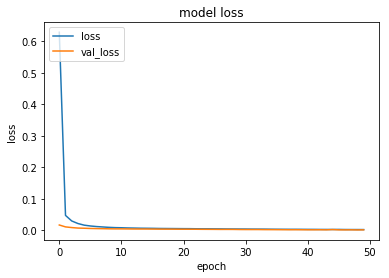

In [0]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    
    plt.legend(['loss', 'val_loss'], loc='upper left')

plot_hist(hist)

# 3. Predition and Recommendation

In [0]:
# Set played game to zero, so that we dont recommend games played
pred_matrix = model.predict(X) * (X[0] == 0)
pred_matrix

array([[ 0.        , -0.00404085,  0.        , ..., -0.0139928 ,
         0.01260016,  0.0013283 ],
       [-0.03618038,  0.00265601, -0.00340295, ..., -0.00156092,
         0.00128573, -0.0063129 ],
       [-0.0040949 ,  0.01429839, -0.0009067 , ...,  0.00291332,
         0.00055867, -0.00293188],
       ...,
       [ 0.00858794, -0.00301381, -0.01012016, ..., -0.00709201,
         0.00957489,  0.00011711],
       [ 0.00684083, -0.00491153, -0.01225244, ..., -0.00361232,
        -0.0026436 , -0.00314015],
       [-0.0291945 , -0.01441739, -0.0375778 , ..., -0.01846938,
        -0.0157177 , -0.00299982]], dtype=float32)

In [0]:
# converting the reconstructed matrix back to a Pandas dataframe
df_pred_matrix  = pd.DataFrame(pred_matrix, 
                               columns = df_matrix.columns[:n], 
                               index   = df_matrix.index[:n])
df_pred_matrix.head()

,10,20,30,40,50,60,70,80,100,130,220,240,280,300,320,340,360,380,400,420,500,550,620,730,1002,1200,1230,1250,1280,1300,1309,1313,1500,1510,1520,1530,1600,1610,1630,1640,...,8890,8930,8970,8980,9000,9010,9030,9040,9050,9060,9070,9160,9180,9200,9310,9340,9350,9400,9420,9450,9460,9480,9500,9710,9730,9740,9760,9800,9850,9860,9870,9880,9900,9930,9940,9960,9970,9980,9990,10000
0,0.000000,-0.004041,0.000000,-0.004659,0.024105,0.040022,0.045772,0.066718,0.014686,0.006196,0.0,0.000000,0.009174,0.000000,0.044946,0.000000,-0.007982,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,-0.016579,0.015815,-0.014610,0.000000,0.009995,0.004508,0.024445,-0.014589,0.010003,0.004307,-0.000899,0.019710,-0.026413,0.018207,0.005588,0.000598,...,0.013695,0.000000,0.006175,0.000000,0.006110,-0.012965,-0.009435,0.012492,-0.004238,-0.037595,0.007232,-0.004712,0.011929,0.000000,-0.015402,0.000000,0.012015,0.002475,0.024545,0.085104,0.014298,0.146186,0.000000,-0.019478,-0.000191,-0.014567,-0.002313,0.013341,-0.009664,0.022665,0.037767,0.020862,-0.019305,0.033415,0.019993,0.012465,0.021515,-0.013993,0.012600,0.001328
1,-0.036180,0.002656,-0.003403,0.006086,0.006631,0.017169,0.031107,0.025450,0.011853,-0.000571,0.0,-0.000000,0.006741,0.000000,0.005333,0.000000,0.004306,0.000000,0.0,0.0,-0.001736,-0.0,0.0,0.0,-0.015850,-0.008983,-0.000205,0.000000,-0.000292,0.002957,0.002307,0.008539,0.001548,0.002938,-0.012859,-0.003833,0.003487,0.011091,-0.003357,-0.000047,...,0.005183,0.000000,0.015219,-0.023855,-0.000156,0.004282,-0.005109,-0.000916,-0.000280,-0.016270,0.000852,0.000200,-0.004845,-0.002933,0.018986,-0.002621,0.009721,0.000425,0.033644,0.035928,-0.003357,0.000000,-0.018275,0.000211,0.011018,0.002121,0.005239,-0.004024,-0.007874,0.005264,0.018421,0.002255,0.023438,0.012952,0.000000,0.002806,-0.001041,-0.001561,0.001286,-0.006313
2,-0.004095,0.014298,-0.000907,0.000375,0.007871,0.006553,0.081576,0.021450,0.000046,0.006901,0.0,-0.113678,0.000941,-0.002146,0.005707,0.000000,0.008519,0.000000,0.0,0.0,0.045581,0.0,0.0,0.0,-0.013007,0.000000,-0.005707,0.000000,0.004996,0.006860,0.000090,-0.015960,0.004249,0.006367,0.000000,-0.014238,-0.016784,0.015876,0.007346,0.013016,...,-0.013404,-0.009505,0.000192,0.000000,-0.007928,0.000000,0.003618,-0.009030,0.000000,-0.016348,-0.004194,-0.007484,0.000000,0.058909,0.012655,-0.005714,0.022694,0.002534,0.031029,0.036441,0.011507,0.059001,-0.013432,-0.018323,0.006669,0.015952,0.007835,-0.016476,0.001649,0.003374,0.025412,0.000483,0.028518,0.005825,0.012543,0.002740,-0.009094,0.002913,0.000559,-0.002932
3,0.004270,-0.002937,-0.018472,0.011977,-0.011520,0.005222,0.019231,0.019025,0.027951,0.010236,0.0,0.000000,-0.000171,0.000000,0.026073,0.019223,0.012431,0.012155,0.0,0.0,0.000000,0.0,0.0,0.0,-0.014583,-0.020983,-0.010025,-0.010917,-0.005203,-0.006106,-0.004522,-0.000299,-0.000028,0.004361,-0.006696,-0.006184,0.003946,0.002690,0.002605,0.001557,...,-0.001995,0.000000,0.032593,0.000000,0.006096,-0.006646,-0.003304,-0.013593,-0.001100,-0.008293,0.003425,0.004764,0.004559,0.043652,-0.003361,-0.015595,0.009872,-0.000527,0.023332,0.018654,0.010608,0.000000,-0.011054,-0.022431,0.014002,0.004945,-0.001189,-0.011030,0.002853,0.010574,0.028755,-0.003960,-0.002377,0.025587,0.000786,0.016529,-0.000756,-0.012961,0.015738,-0.004129
4,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.043215,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.005902,0.000000,0.000000,0.000000,-0.022148,0.000000,0.0,0.0,0.122293,0.0,0.0,0.0,-0.005272,0.018364,-0.013664,0.000000,-0.001586,-0.000000,0.020294,-0.000000,0.000000,0.027245,0.000000,-0.013747,-0.026420,0.018166,0.005279,-0.006137,...,0.001986,0.000000,0.009444,0.000000,-0.016147,0.000000,-0.014089,0.005688,0.000000,-0.015324,0.013188,0.014591,0.004039,0.000000,0.013873,0.000000,0.028759,0.003937,0.034134,0.071891,-0.000698,0.000000,0.008350,-0.022821,-0.004123,-0.026566,-0.005721,0.001149,0.001451,-0.003462,0.018346,-0.002710,0.005931,-0.008168,0.015351,0.003071,0.019118,-0.004174,-0.004952,0.009266


In [0]:
def recommendor(user_id, df_matrix, df_pred_matrix, df_games = df_games, topn = 5):
  #Get general scores
  pred_scores = df_pred_matrix.loc[user_id] #get the user column

  #First tell user history
  playtime = df_matrix.loc[user_id]
  played = playtime[playtime > 0].index
  df_playtime = pd.DataFrame({'time': df_matrix.loc[user_id].values}, index =	df_matrix.columns.astype(int))
  df_played_game = df_games.reindex(played.astype(int))
  df_history = pd.merge(df_playtime, df_played_game, how='right', left_index=True, right_index=True).sort_values('time', ascending=False)
  df_history.index.name = 'game_id'
  print('User played:')
  print(print(df_history.head(10).to_string()))

  #Then results
  pred_scores[played] = 0
  df_scores_all = pd.DataFrame({'score': pred_scores.values}, index = df_matrix.columns.astype(int))
  df_recommend = pd.merge(df_scores_all, df_games, how='left', left_index=True, right_index=True)
  df_recommend.index.name = 'game_id'
  print('We recommend:')
  print(df_recommend.sort_values('score', ascending=False).head(topn).to_string())

  return

In [0]:
recommendor(user_id = 0, df_matrix = df_matrix, df_pred_matrix = df_pred_matrix, topn = 10, df_games = df_games)

User played:
          time                               name                   genres                                          publisher                     developer  price
game_id                                                                                                                                                           
730      23532   Counter-Strike: Global Offensive               ['Action']                                              Valve                         Valve  14.99
8930     10345        Sid Meier's Civilization® V             ['Strategy']                   Firaxis Games,Aspyr (Mac, Linux)  2K Games, Aspyr (Mac, Linux)  29.99
1250     10006                      Killing Floor               ['Action']                               Tripwire Interactive          Tripwire Interactive  19.99
300       4733              Day of Defeat: Source               ['Action']                                              Valve                         Valve   9.99
3590     

In [0]:
recommendor(user_id = 10000, df_matrix = df_matrix, df_pred_matrix = df_pred_matrix, topn = 10, df_games = df_games)

User played:
          time                                      name                   genres          publisher                                 developer  price
game_id                                                                                                                                              
730      39615          Counter-Strike: Global Offensive               ['Action']              Valve                                     Valve  14.99
4000      5123                               Garry's Mod  ['Indie', 'Simulation']  Facepunch Studios                                     Valve   9.99
550       1215                             Left 4 Dead 2               ['Action']              Valve                                     Valve  19.99
620        710                                  Portal 2  ['Action', 'Adventure']              Valve                                     Valve  19.99
6060       118  Star Wars: Battlefront 2 (Classic, 2005)               ['Action']   Pan